In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

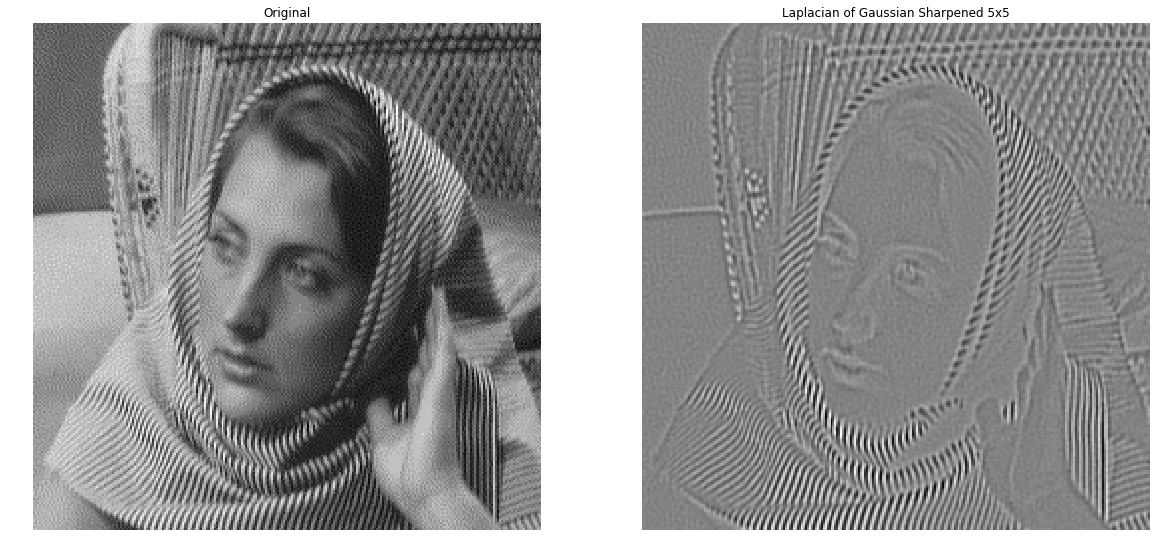

In [2]:
plt.figure(figsize=(20, 20))

# Original clean woman image (in Gray)
img = cv2.imread('./images/woman.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')

# Sharpen woman image using Gaussian Filter 5x5 with variance 0
img_gaussian = cv2.GaussianBlur(img, (5, 5), 0)
img_gaussian_sharp = (img + (img - img_gaussian))
# img_gaussian_sharp = cv2.add(img, cv2.subtract(img, img_gaussian))

# Laplacian edge detector 5x5 of woman image
img_laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
plt.subplot(122), plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian of Gaussian Sharpened 5x5'), plt.axis('off')

# Display all images
plt.show()